<a href="https://colab.research.google.com/github/sharmashubam/pyTorch_basics/blob/main/01_pyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from  torch import nn
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

In [ ]:
#creating known parameters

weight = 0.7
bias = 0.3

# creating the data
start= 0
end =10
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# splitting the data into training and testing

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [ ]:
# visualising hte data

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  plt.legend(prop={"size": 14});

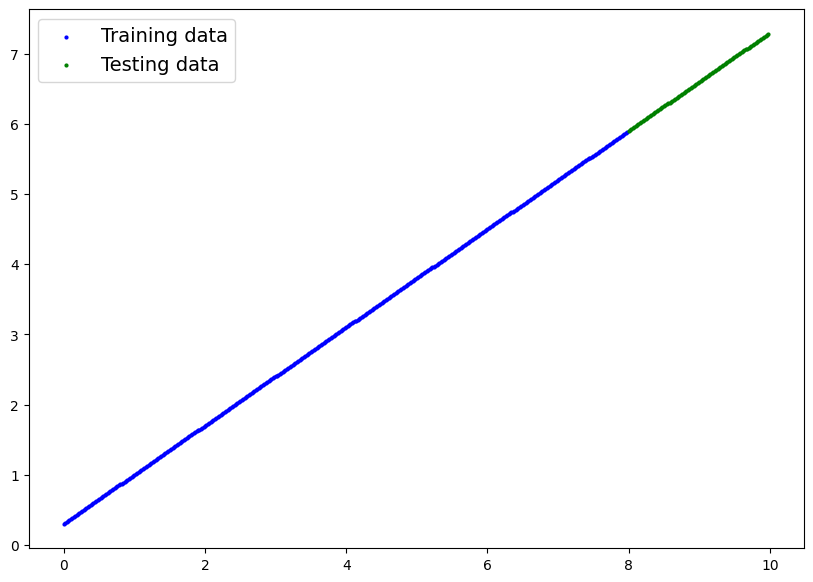

In [ ]:
plot_predictions()

In [ ]:
#creaitng first pyTorch model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                   requires_grad=True) 
    self.bias = nn.Parameter(torch.randn(1,
                                          dtype=torch.float), 
                                 requires_grad=True) 
    
  
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias 



In [ ]:
#exploring pyTorch model
torch.manual_seed(42)

model_0= LinearRegressionModel()

# checking the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#making prediction using the model

with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [ ]:
# setting hte loss fxn and optimizer

# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Training loop intitution
# building a training loop in pyTorch

# step 0 --> Loop through the data
epochs =100
for epoch in range(epochs):

  # Traininf the model
  model_0.train()  # train mode sets all the parametes that require gradient descent to have gradient descent
  
  # step 1 : forward pass on train data using forward() method
  y_pred = model_0(X_train)
  # print(y_pred[:10])
  
  # step 2: calculate the loss
  loss=loss_fn(y_pred,y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer
  optimizer.step()


  ### Testing the model  

  # turns off the grad descent
  model_0.eval()

  with torch.inference_mode():

    # 1. Froward pass
    test_pred= model_0(X_test)

    # 2 calculate the test loss
    test_loss= loss_fn(test_pred, y_test)
